## Telecom Churn Prediction Dataset

Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).

### Importing necessary Libraries 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading dataset

tl_cs = pd.read_csv(r"D:\BIA\OneDrive_2025-10-10\01_DATA SCIENCE WORKFLOW - PART 1\Telco_Customer_Churn.csv")

#### EDA PROCESS

In [4]:
tl_cs.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
tl_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insight: Most features are categorical with some numerical; checking data types helps identify preprocessing needs.

In [6]:
tl_cs.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Insight: Summary statistics reveal variation in monthly and total charges, useful for churn correlation later.

In [7]:
tl_cs.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# Converting Total Charges to a numerical data type.

tl_cs.TotalCharges = pd.to_numeric(tl_cs.TotalCharges, errors = 'coerce')

In [9]:
tl_cs.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing missing values 

tl_cs.dropna(inplace = True)

Insight: Removing rows with missing TotalCharges ensures consistent numerical analysis.

In [11]:
tl_cs.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Removing Customer ID

df1 = tl_cs.drop('customerID', axis = 1)

Insight: CustomerID dropped as it doesn’t contribute to churn prediction.

In [13]:
#Convertin the predictor variable in a binary numeric variable

df1['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df1['Churn'].replace(to_replace = 'No',  value = 0, inplace = True)

Insight: Churn column encoded to 1 (Yes) and 0 (No) for model compatibility

In [14]:
#Convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df1)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


Insight: All categorical variables encoded into dummy variables for numerical modeling.

<Axes: >

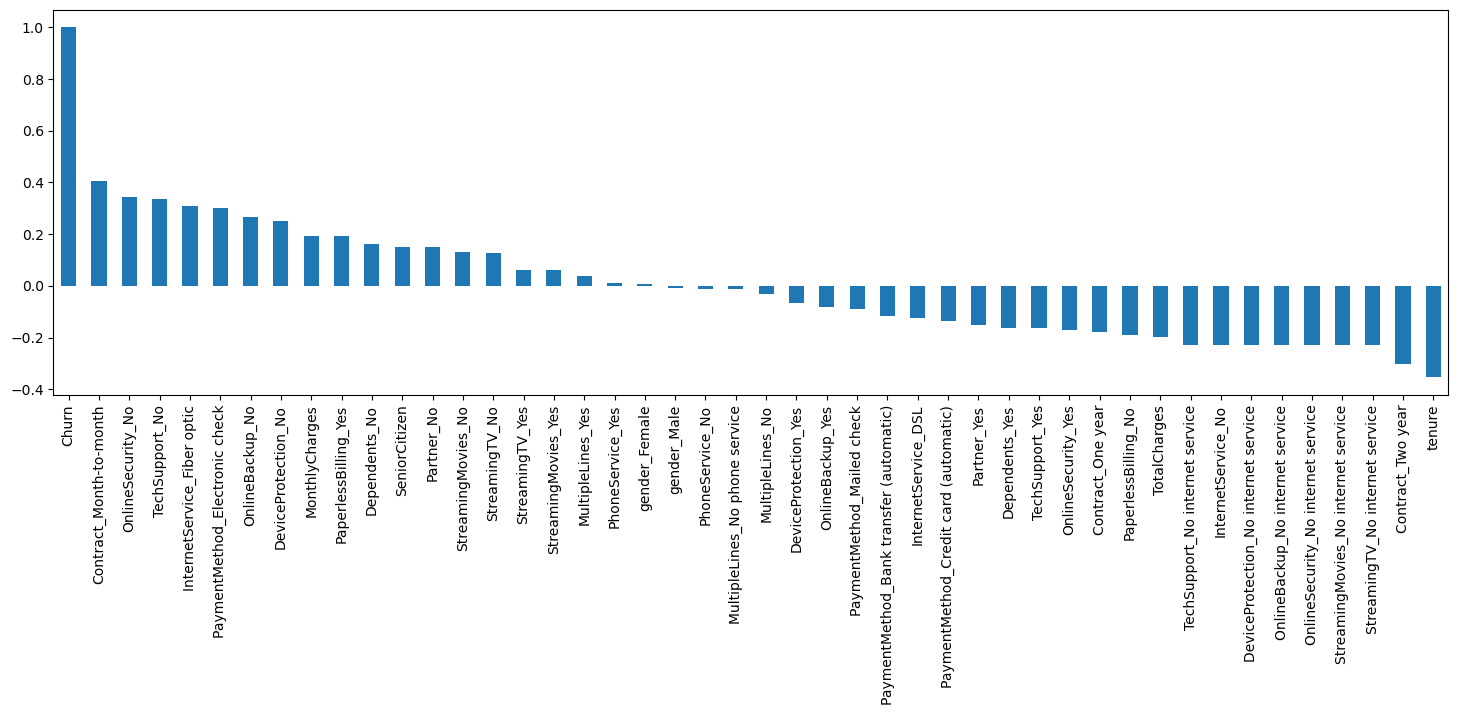

In [15]:
# Getting Correlation of "Churn" with other variables

plt.figure( figsize = (18,5))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

### INTERPRETATION 

The graph shows correlations of features with Churn: 

• Positive values → higher churn likelihood. (month-to-month contracts, no online security/tech support) 

• Negative values → lower churn likelihood. (2 year contract, no internet services)

Key points: 

• Customers with month-to-month contracts, no online security/tech support, or electronic check payments are more likely to churn. 

• Longer tenure and long-term contracts (one/two year) reduce churn. 

• Extra services like OnlineSecurity_Yes and TechSupport_Yes help retain customers.

## Data Exploration

### A) Demographic
• Gender, Age, Partner Dependent

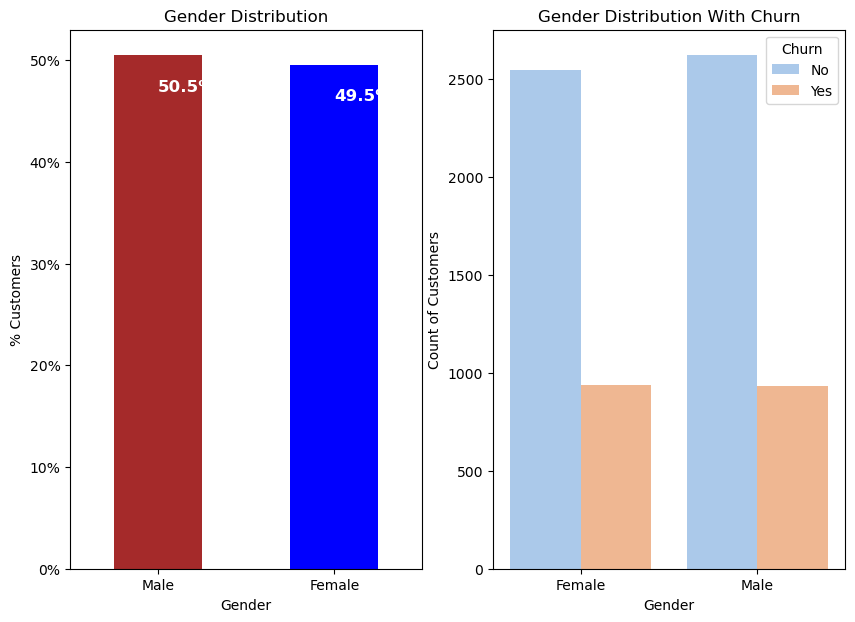

<Figure size 1000x700 with 0 Axes>

In [16]:
# Gender Distribution

gender_counts = tl_cs['gender'].value_counts()

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2 , sharey = False, figsize = (10,7))

ax = (gender_counts * 100.0 / len(tl_cs)).plot(
    kind = 'bar',
    stacked = True,
    rot = 0,
    color = ['brown', 'blue'],
    ax = ax1
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Iterate over the bar heights and add labels to the bars
total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',
            fontsize = 12,
            color = 'white',
            weight = 'bold'
           )

plt.figure(figsize = (10, 7))

ax = sns.countplot(data = tl_cs, x = 'gender', palette = 'pastel', hue = 'Churn', ax = ax2)

ax.set_title('Gender Distribution With Churn')
ax.set_xlabel('Gender')
ax.set_ylabel('Count of Customers')
plt.show()

Insight: Churn rate is similar across genders, showing gender has minimal churn influence.

Text(0.5, 1.0, '% of Senior Citizens')

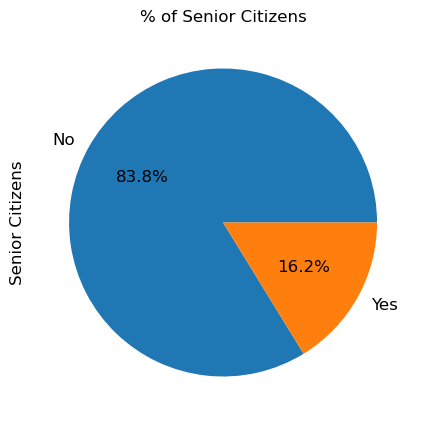

In [17]:
# Senior Citizens

ax = (tl_cs['SeniorCitizen'].value_counts() * 100.0 / len(tl_cs))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize = (5, 5), fontsize = 12 )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Insight: Senior citizens are less, indicating high number of youngsters.

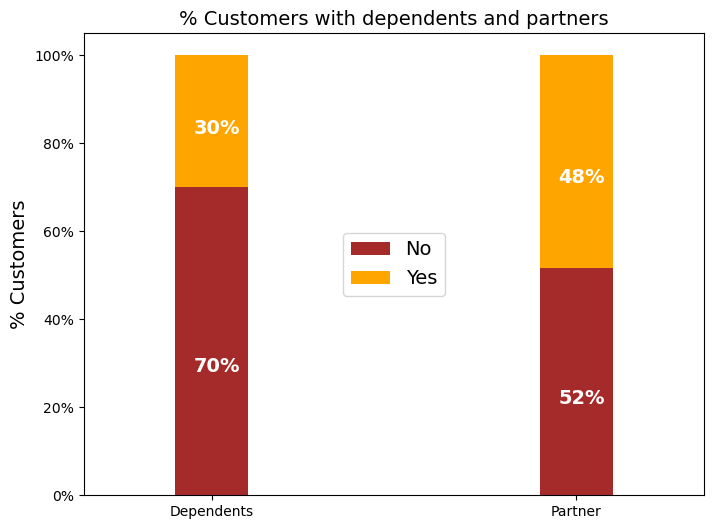

In [18]:
# Partner and Dependent Status

df2 = pd.melt(tl_cs, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3 * 100 / len(tl_cs)

colors = ['brown','orange']
ax = df3.loc[:,'customerID'].plot(
    kind = 'bar',
    stacked = True, 
    color = colors,
    figsize = (8,6),
    rot = 0,
    width = 0.2
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% Customers with dependents and partners',size = 14)
ax.set_ylabel('% Customers', size = 14)
ax.set_xlabel('')
ax.legend(loc = 'center', prop={'size': 14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color = 'white',
               weight = 'bold',
               size = 14)

Insight: Customers without partners tend to churn more, suggesting relationship stability may reduce churn.

Insight: Customers with dependents churn less, likely due to higher commitment or bundled usage.

### B) Customer Account Information

• Tenure & Contract

Text(0.5, 1.0, 'No of Customers by their tenure With Churn')

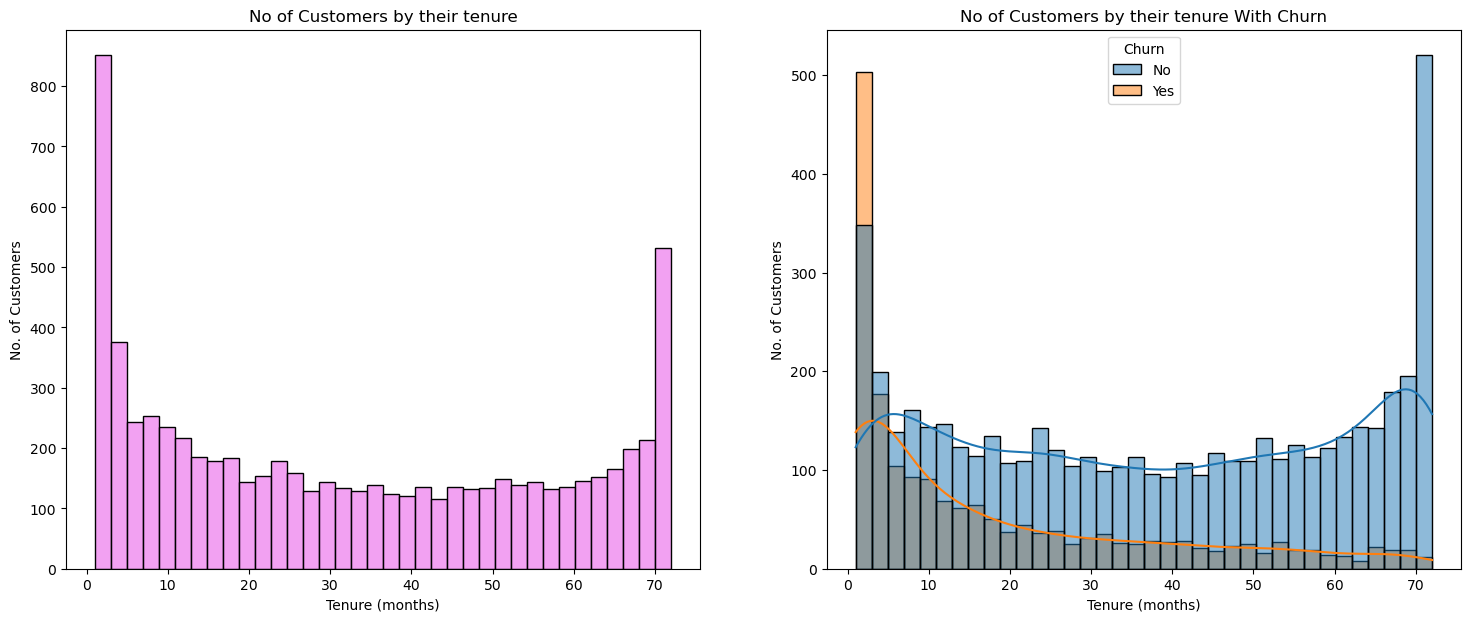

<Figure size 1000x700 with 0 Axes>

In [19]:
# Tenure

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2 , sharey = False, figsize = (18,7))

ax = sns.histplot(
    data = tl_cs,
    x = 'tenure',
    kde=False, 
    bins=int(180/5),
    color = 'violet',
    ax = ax1
)

ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')

plt.figure(figsize = (10, 7))

ax = sns.histplot(
    data = tl_cs,
    x = 'tenure',
    kde = True, 
    bins = int(180/5),  
    color = 'violet',
    hue = 'Churn', 
    ax = ax2
)

ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure With Churn')

Insight: Short-tenure customers are more likely to churn, implying retention focus is needed in early months.

Text(0.5, 1.0, 'No. of Customers by Contract Type')

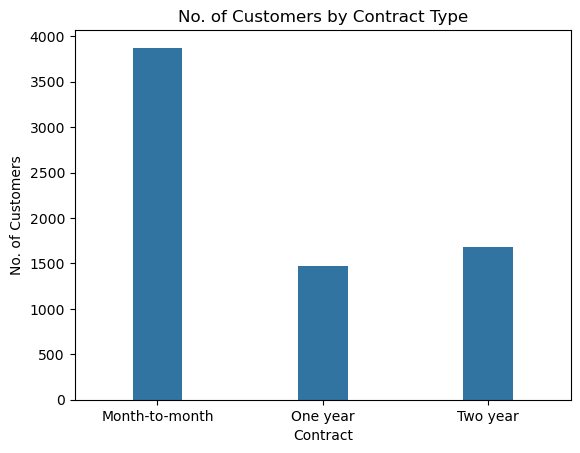

In [20]:
# Contract Type

ax = sns.countplot(data = tl_cs, x = 'Contract', width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')

Insight: Month-to-month contracts have highest churn; long-term contracts show loyalty.

Text(0.5, 1.0, 'Two Year Contract')

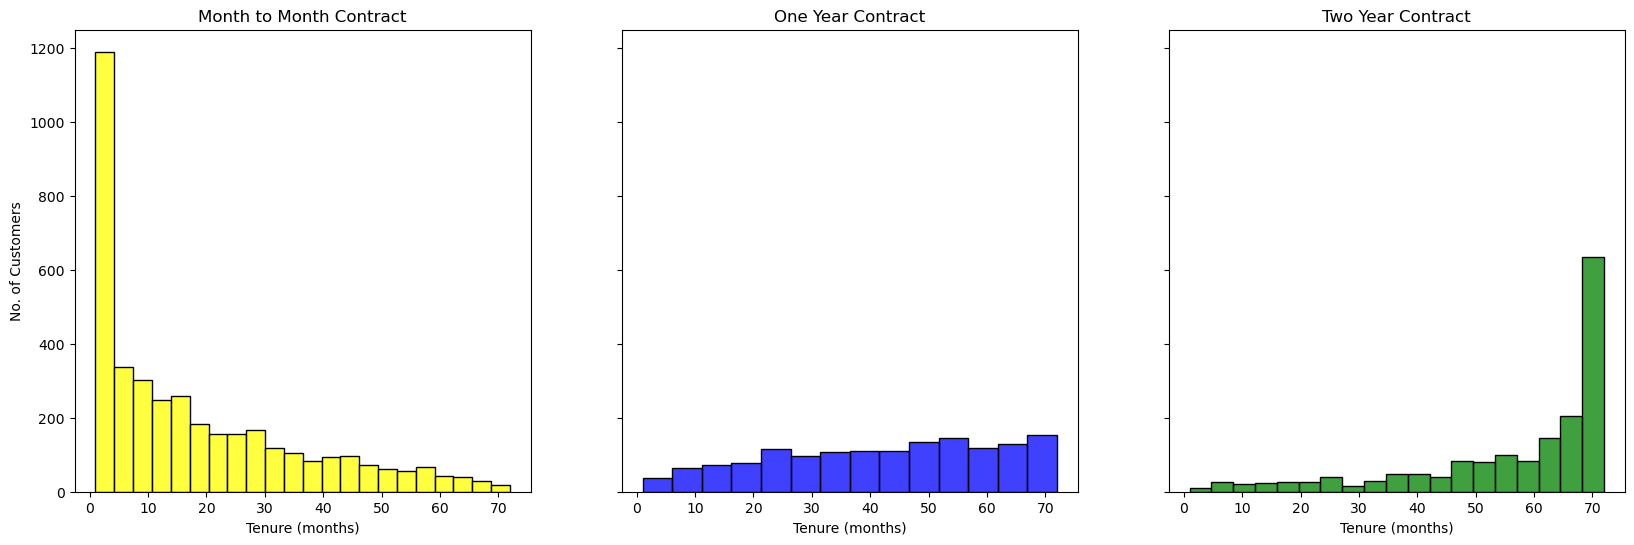

In [21]:
#Plotting all the types in a single block

fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (20,6))

month_to_month_df = tl_cs[tl_cs['Contract'] == 'Month-to-month']

ax = sns.histplot(month_to_month_df, x = 'tenure', kde = False, color = 'yellow', ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')


one_year_df = tl_cs[tl_cs['Contract']=='One year']

ax = sns.histplot(one_year_df, x = 'tenure', kde = False, color = 'blue', ax=ax2)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')


two_year_df = tl_cs[tl_cs['Contract'] == 'Two year']

ax = sns.histplot(two_year_df, x = 'tenure', kde = False, color = 'green', ax=ax3)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


Text(0.5, 1.0, 'Two Year Contract')

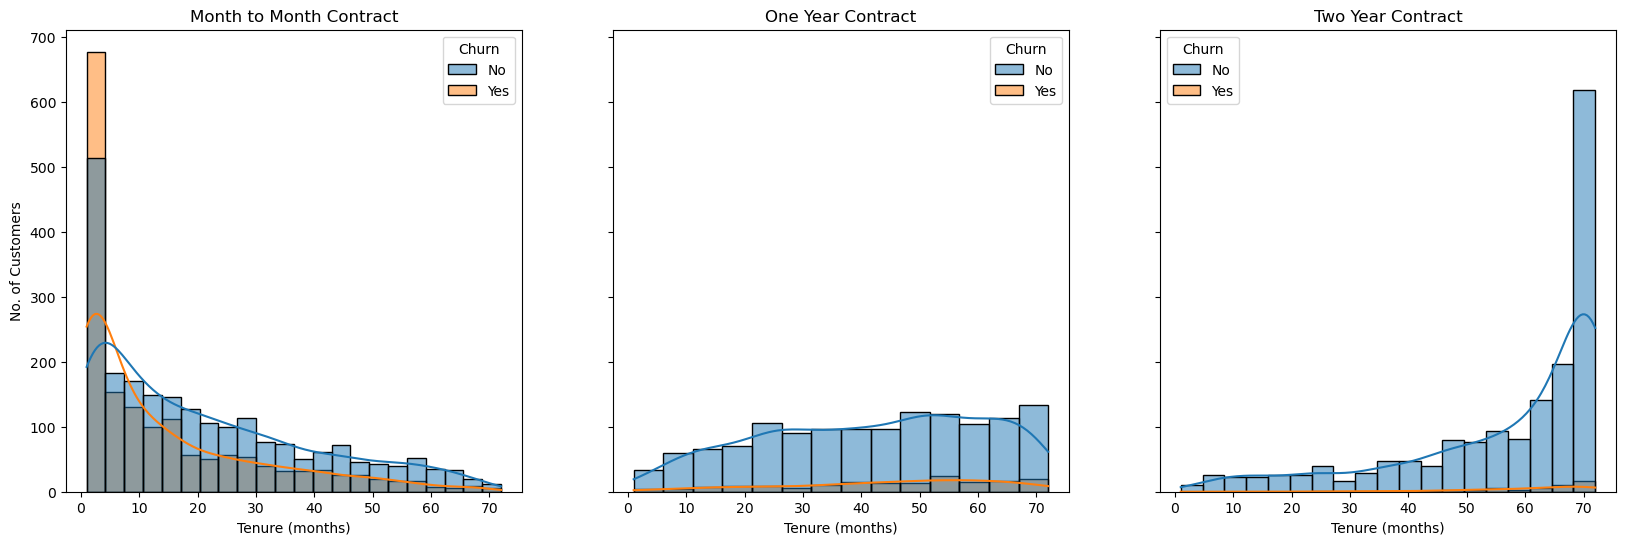

In [22]:
#with churn
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, #sharing y axis 
                                  figsize = (20,6))

month_to_month_df = tl_cs[tl_cs['Contract'] == 'Month-to-month']

ax = sns.histplot(month_to_month_df, x = 'tenure', kde = True, color = 'yellow', ax = ax1, hue = 'Churn')
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')


one_year_df = tl_cs[tl_cs['Contract'] =='One year']

ax = sns.histplot(one_year_df, x = 'tenure', kde = True, color = 'blue', ax = ax2, hue = 'Churn')
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')


two_year_df = tl_cs[tl_cs['Contract'] == 'Two year']

ax = sns.histplot(two_year_df, x = 'tenure', kde = True, color = 'green', ax = ax3, hue = 'Churn')
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')


### C) Services Used By Customers

In [23]:
tl_cs.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

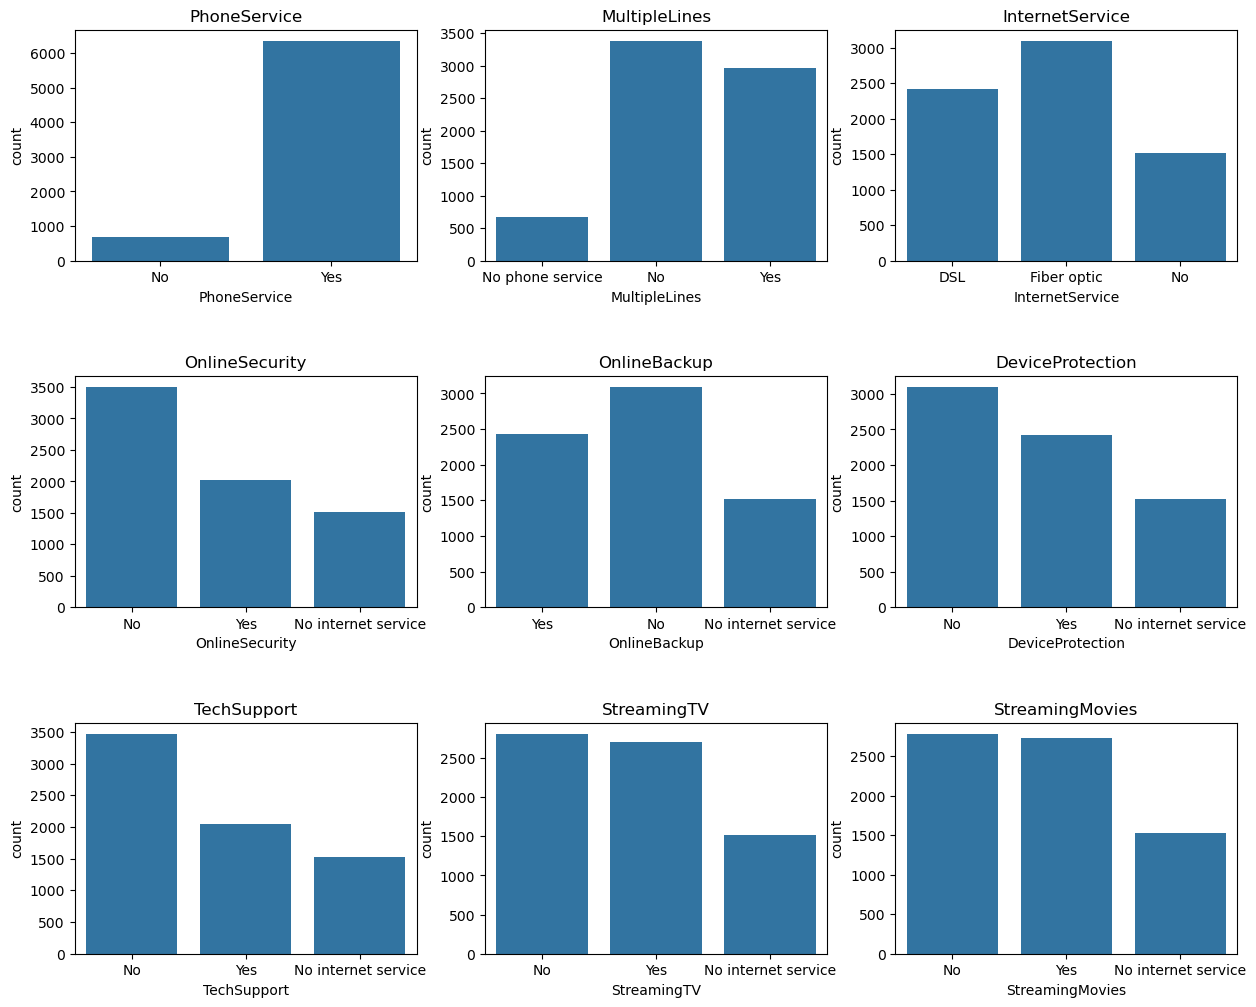

In [24]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 12))
plt.subplots_adjust(hspace = 0.5)  # Adjust vertical spacing between subplots

for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Calculate row and column index
    ax = sns.countplot(data = df1, x = item, ax = axes[row, col])
    ax.set_title(item)

plt.show()

###  Insights — Services Used by Customers

- Customers using **Fiber Optic internet** have the highest churn, likely due to higher cost or service dissatisfaction.  
- Customers **without Online Security** churn more, showing security add-ons improve retention.  
- Lack of **Online Backup** correlates with higher churn, suggesting bundled backup services enhance loyalty.  
- Absence of **Device Protection** increases churn risk, highlighting the importance of protection plans.  
- Customers **without Tech Support** churn significantly more, indicating support quality directly impacts retention.  
- **Streaming TV** users show slightly higher churn, possibly due to cost sensitivity or competing entertainment options.  
- **Streaming Movies** customers also churn more, implying entertainment add-ons alone don’t ensure loyalty.  
- Customers with **Multiple Lines** churn less, suggesting multi-line or bundled packages help maintain long-term relationships.


### D) Relation Between Monthly & Totalm Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

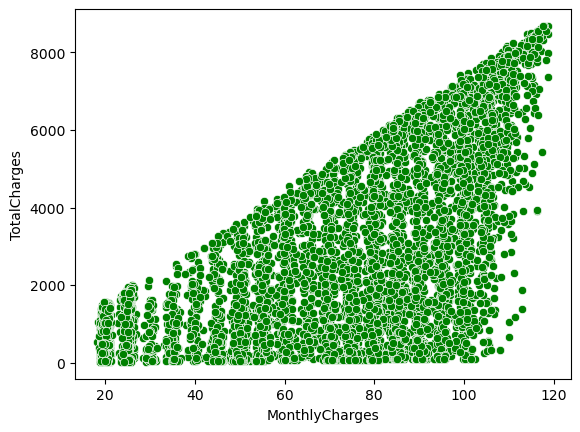

In [25]:
sns.scatterplot(data = tl_cs, x = 'MonthlyCharges', y = 'TotalCharges', color = 'green')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

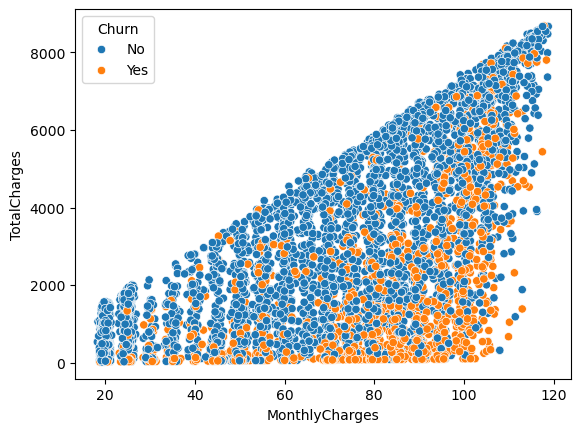

In [26]:
sns.scatterplot(data = tl_cs, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn')

###  Insights — Relationship Between Monthly and Total Charges

- A positive correlation exists between **Monthly Charges** and **Total Charges**, as higher monthly fees naturally lead to higher totals.  
- **Churned customers** are often found in the **high monthly but low total charge range**, indicating they left early after facing high costs.  
- **Long-term customers** show higher total charges with moderate monthly rates, suggesting sustained engagement at reasonable pricing.  

### E) Relatioship betweeen indepent variable (churn) & other important variables

In [27]:
# Churn rate with customer

(tl_cs['Churn'].value_counts() * 100.0 / len(tl_cs))

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

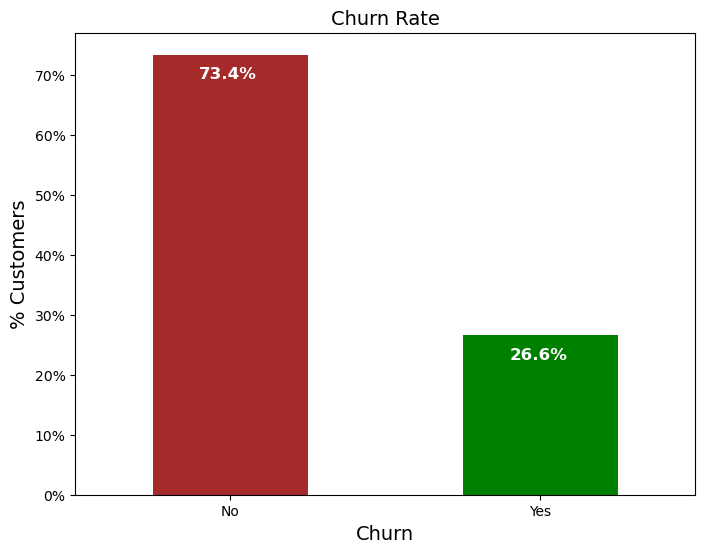

In [28]:
colors = ['brown', 'green']
ax = (tl_cs['Churn'].value_counts() * 100.0 / len(tl_cs)).plot(
    kind = 'bar',
    stacked = True,
    rot = 0,
    color = colors,
    figsize = (8, 6)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size = 14)
ax.set_xlabel('Churn', size = 14)
ax.set_title('Churn Rate', size = 14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

<Axes: xlabel='Churn', ylabel='tenure'>

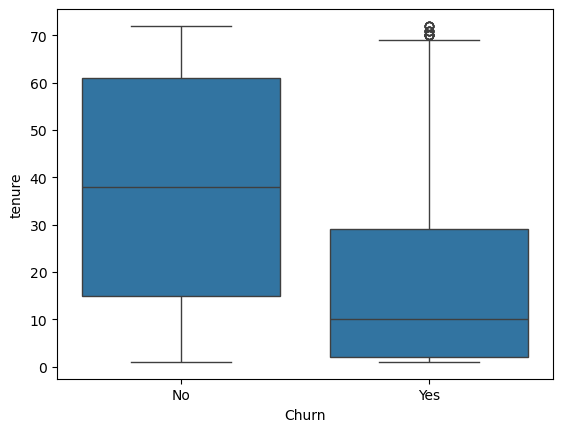

In [29]:
# Churn vs Tenure

sns.boxplot(data=tl_cs, x = 'Churn', y = 'tenure')

Insight : **Tenure** has an inverse relationship with churn — newer customers are more likely to leave than long-term ones.  

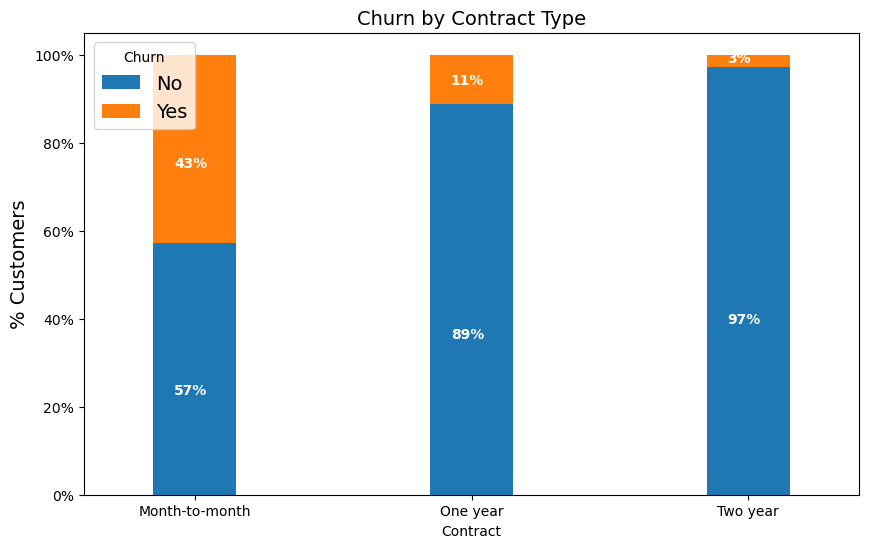

In [30]:
# Churn by Contract Type

contract_churn = tl_cs.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color = 'white',
               weight = 'bold',
               size = 10)


Insight: Month-to-month contracts have highest churn; long-term contracts show loyalty.

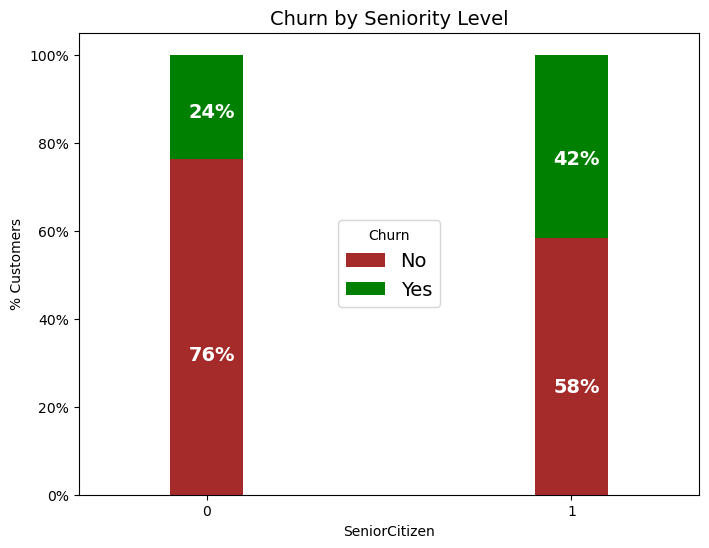

In [31]:
# Churn by Seniority Level

colors = ['brown','green']
seniority_churn = tl_cs.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'center',prop = {'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color = 'white',
               weight = 'bold',size = 14)

Insight: Senior citizens are less churn, indicating high number of youngsters.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

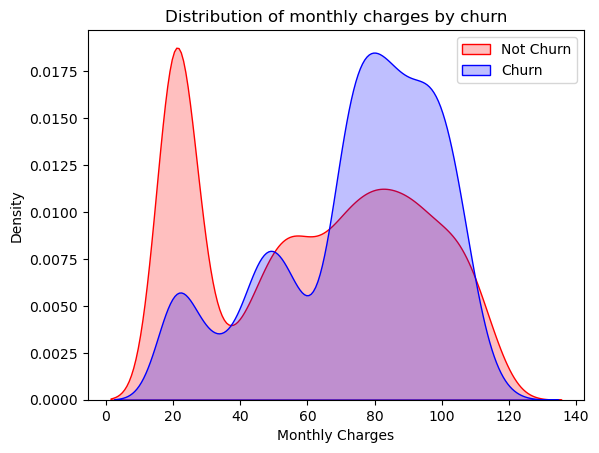

In [32]:
# Churn by Monthly Charges

ax = sns.kdeplot(tl_cs.MonthlyCharges[(tl_cs["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(tl_cs.MonthlyCharges[(tl_cs["Churn"] == 'Yes') ],
                ax = ax, color = "Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Insight : **Monthly Charges** correlate positively with churn — higher bills often lead to cancellations.   

Text(0.5, 1.0, 'Distribution of total charges by churn')

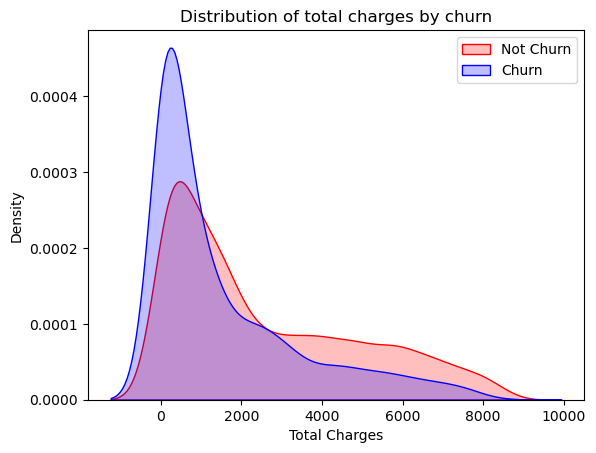

In [33]:
# Churn by total charges

ax = sns.kdeplot(tl_cs.TotalCharges[(tl_cs["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(tl_cs.TotalCharges[(tl_cs["Churn"] == 'Yes') ],
                ax = ax, color = "Blue", shade = True)
ax.legend(["Not Churn","Churn"],loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Insight : **Total Charges** correlate negatively with churn — customers who spend more overall are usually long-term and loyal.

## Predictive ML Modeling

Testing various ML models

#### Logistic Regression

In [34]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [35]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [36]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [37]:
from sklearn import metrics
prediction_test = model.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


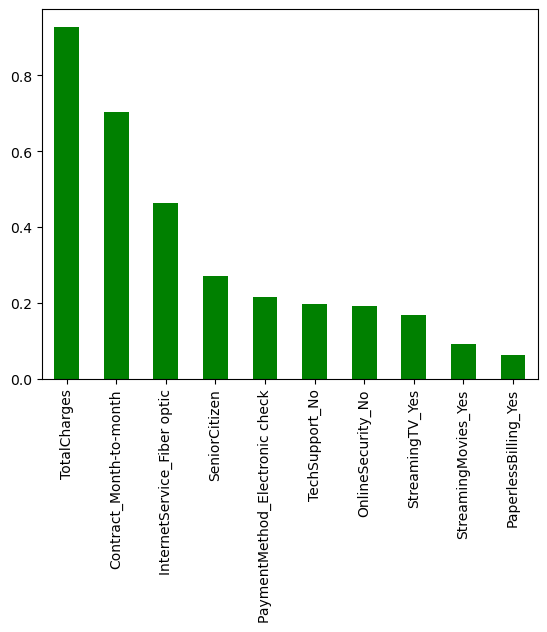

In [38]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


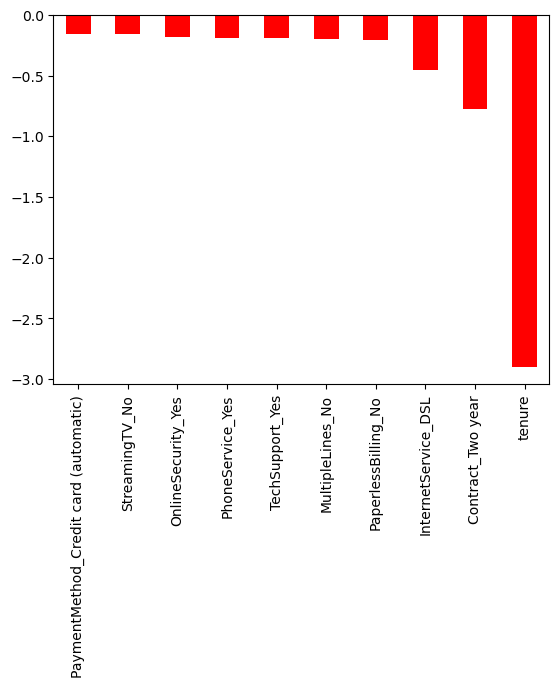

In [39]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))

#### Insigghts
- A baseline linear model that performs decently on balanced data.
- Captures simple linear relationships but may underfit complex patterns in churn behavior.

#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
model_rf = RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 50, max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<Axes: >

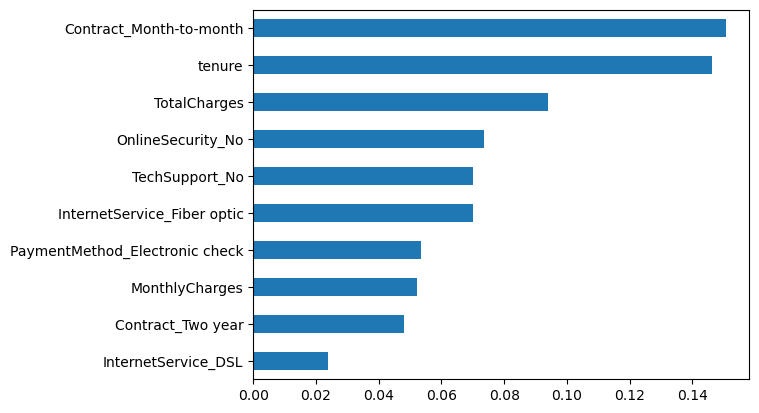

In [41]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Insights
- Ensemble model that improves prediction accuracy by combining multiple decision trees.
- Handles feature interactions well and reduces overfitting compared to a single tree.

#### SVM

In [42]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [43]:
# Creating the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
cm = confusion_matrix(y_test,preds)
print(cm)

[[953  89]
 [164 201]]


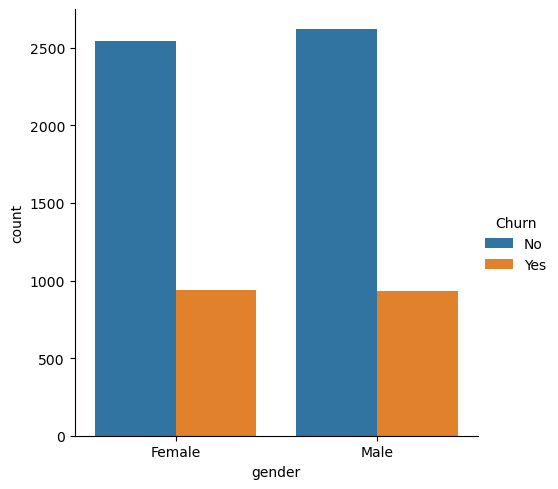

In [44]:
ax1 = sns.catplot(x = "gender", kind = "count", hue = "Churn", data = tl_cs,
                  estimator = lambda x: sum(x==0) * 100.0 / len(x))

<Axes: >

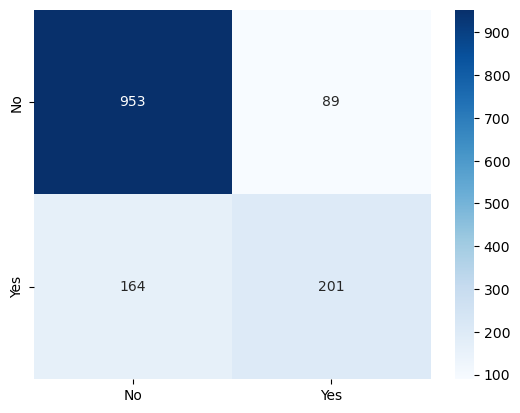

In [45]:
labels = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

#### Insights
-Works well for distinguishing churn and non-churn groups with clear boundaries.
-Can struggle with large datasets or overlapping classes without proper kernel tuning.

#### ADA Boost

In [46]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8166311300639659

#### Insights
- Sequentially focuses on misclassified samples, improving accuracy on difficult cases.
- Sensitive to noisy data but adds interpretability and strong performance on moderate-sized data.

#### XG Boost

In [47]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8009950248756219

#### Insights
- The most powerful model in your notebook, achieving the best balance of accuracy and generalization.
- Efficiently handles nonlinear relationships and feature importance for churn prediction.